# What Is Customer Churn?
Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. You can calculate churn rate by dividing the number of customers you lost during that time period -- say a quarter -- by the number of customers you had at the beginning of that time period.

For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.

# Library and import Data

In [79]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from  sklearn.model_selection import train_test_split
%matplotlib inline 

In [ ]:
Churn_Data = pd.read_csv ('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
Churn_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA


## Drop Coloums

In [ ]:
Churn_Data.drop('customerID',axis='columns',inplace=True)

#### Comment :
Customer leaving is independent to customerId

In [ ]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Check any number as string and convert all object as numeric by numeric method or hot label encoding 

In [ ]:
Churn_Data_Upate = Churn_Data[Churn_Data.TotalCharges!=' ']

In [ ]:
Churn_Data_Upate.shape

(7032, 20)

In [ ]:
Churn_Data_Upate.TotalCharges = pd.to_numeric(Churn_Data_Upate.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### comment 
when this cell is executed before the first cell is executed , it happened to error because there ae spaces in the columns







In [ ]:
Churn_Data_Upate.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Churn_Data_Upate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


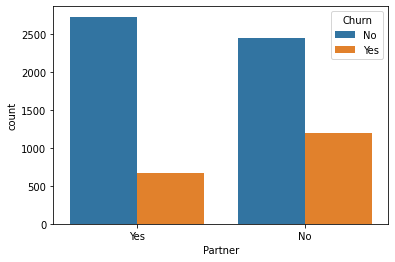

In [ ]:
sns.countplot(data= Churn_Data_Upate ,x = 'Partner', hue= 'Churn')


#### comment : 
- In the precence of partenr with customer, the customer churn rate decrease highly
- In the absence of partner with customer, the customer churn rate decrease lowly 

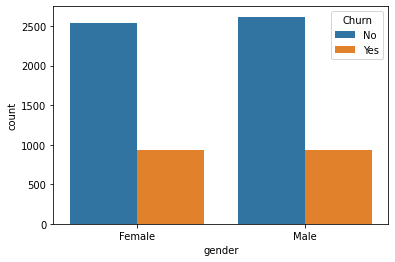

In [ ]:
sns.countplot(data= Churn_Data_Upate ,x = 'gender', hue= 'Churn')

#### comment :
- if the customer is female or male , the customer churn rate is constant 
- then i will drop gender feature n

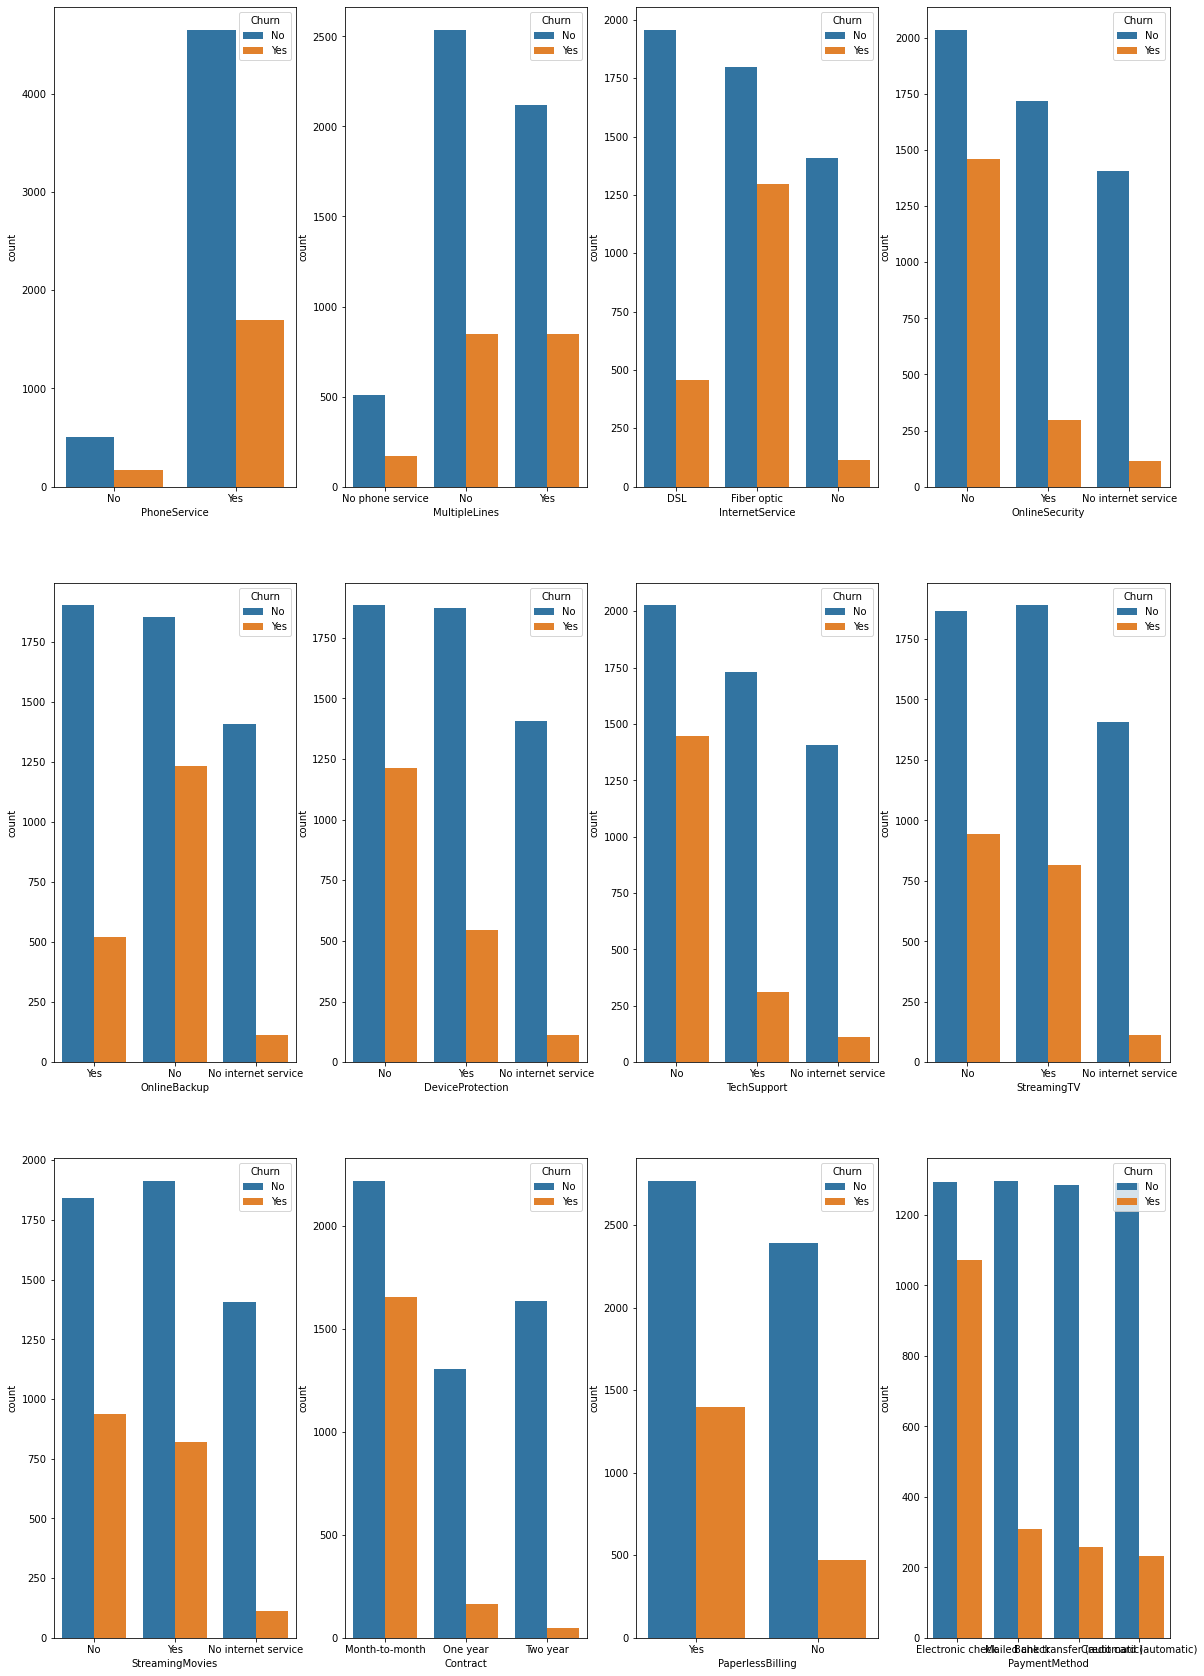

In [ ]:
fig ,axes = plt.subplots(3,4,figsize= (20,30))
sns.countplot(data=Churn_Data_Upate , x= 'PhoneService'   ,hue='Churn',ax= axes[0][0])
sns.countplot(data=Churn_Data_Upate , x= 'MultipleLines'   ,hue='Churn',ax= axes[0][1])
sns.countplot(data=Churn_Data_Upate , x= 'InternetService'   ,hue='Churn',ax= axes[0][2])
sns.countplot(data=Churn_Data_Upate , x= 'OnlineSecurity'   ,hue='Churn',ax= axes[0][3])
sns.countplot(data=Churn_Data_Upate , x= 'OnlineBackup'   ,hue='Churn',ax= axes[1][0])
sns.countplot(data=Churn_Data_Upate , x= 'DeviceProtection'   ,hue='Churn',ax= axes[1][1])
sns.countplot(data=Churn_Data_Upate , x= 'TechSupport'   ,hue='Churn',ax= axes[1][2])
sns.countplot(data=Churn_Data_Upate , x= 'StreamingTV'   ,hue='Churn',ax= axes[1][3])
sns.countplot(data=Churn_Data_Upate , x= 'StreamingMovies'   ,hue='Churn',ax= axes[2][0])
sns.countplot(data=Churn_Data_Upate , x= 'Contract'   ,hue='Churn',ax= axes[2][1])
sns.countplot(data=Churn_Data_Upate , x= 'PaperlessBilling'   ,hue='Churn',ax= axes[2][2])
sns.countplot(data=Churn_Data_Upate , x= 'PaymentMethod'   ,hue='Churn',ax= axes[2][3])


#### Comment :
- Phone Service :
    - Most of customer using it,also when use it, the customer chn rate decrease 
- Multiple Line :
    - Most of customer using it,also when customer do not use it, the customer chn rate decrease 
           Then, the phone service can dropped , since Multople line include the phone service
- InternetService :
    - In presence of DSL and Fiber , the customer churn rate decrease
- OnlineSecurity  :
    - In absence of online security, the customer churn rate decrease 
- OnlineBackup    :
    - In absence of OnlineBackup, the customer churn rate increase
- DeviceProtection:
    - In absence of DeviceProtection, the customer churn rate increase
- TechSupport:
    - In absence of TechSupport, the customer churn rate increase    
- StreamingTV:
    - In absence of StreamingTV, the customer churn rate increase  
- StreamingMovies:
    - In absence of StreamingMovies, the customer churn rate increase
- Contract:
    - In presence of month-to-month in contract, the customer churn rate increase        
- PaperlessBilling:
    - - In absence of PaperlessBilling, the customer churn rate dercease
- PaymentMethod  :
    - In presence of electronic type, the customer churn rate increase 


In [ ]:
Churn_Data_Upate.drop('PhoneService',axis='columns',inplace=True)
Churn_Data_Upate.drop('gender',axis='columns',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Hot Label encoding 

In [ ]:

Label_root = LabelEncoder()

Label_MultipleLines      =Label_root.fit_transform(Churn_Data_Upate['MultipleLines' ])
Label_InternetService    =Label_root.fit_transform(Churn_Data_Upate['InternetService'])
Label_OnlineSecurity     =Label_root.fit_transform(Churn_Data_Upate['OnlineSecurity'])
Label_OnlineBackup       =Label_root.fit_transform(Churn_Data_Upate['OnlineBackup'])
Label_DeviceProtection   =Label_root.fit_transform(Churn_Data_Upate['DeviceProtection'])
Label_TechSupport        =Label_root.fit_transform(Churn_Data_Upate['TechSupport'])
Label_StreamingTV	       =Label_root.fit_transform(Churn_Data_Upate['StreamingTV'  ])
Label_StreamingMovies    =Label_root.fit_transform(Churn_Data_Upate['StreamingMovies' ])
Label_Contract           =Label_root.fit_transform(Churn_Data_Upate['Contract'])
Label_PaperlessBilling   =Label_root.fit_transform(Churn_Data_Upate['PaperlessBilling'])
Label_RPaymentMethod     =Label_root.fit_transform(Churn_Data_Upate['PaymentMethod'])
Label_dependent          =Label_root.fit_transform(Churn_Data_Upate['Dependents'])
Label_partner            =Label_root.fit_transform(Churn_Data_Upate['Partner'])
Label_Churn              =Label_root.fit_transform(Churn_Data_Upate['Churn'])

 
Churn_Data_Upate['MultipleLines' ]  =Label_MultipleLines     
Churn_Data_Upate['InternetService'] =Label_InternetService   
Churn_Data_Upate['OnlineSecurity']  =Label_OnlineSecurity    
Churn_Data_Upate['OnlineBackup']    =Label_OnlineBackup      
Churn_Data_Upate['DeviceProtection']=Label_DeviceProtection  
Churn_Data_Upate['TechSupport']     =Label_TechSupport       
Churn_Data_Upate['StreamingTV'  ]   =Label_StreamingTV	      
Churn_Data_Upate['StreamingMovies' ]=Label_StreamingMovies   
Churn_Data_Upate['Contract']        =Label_Contract          
Churn_Data_Upate['PaperlessBilling']=Label_PaperlessBilling  
Churn_Data_Upate['PaymentMethod']   =Label_RPaymentMethod   
Churn_Data_Upate['Dependents']      =Label_dependent
Churn_Data_Upate['Partner']         =Label_partner
Churn_Data_Upate['Churn']           =Label_Churn



<ipython-input-74-5c47dc346b41>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_Data_Upate['MultipleLines' ]  =Label_MultipleLines
<ipython-input-74-5c47dc346b41>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_Data_Upate['InternetService'] =Label_InternetService
<ipython-input-74-5c47dc346b41>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
Churn_Data_Upate.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Heatmap

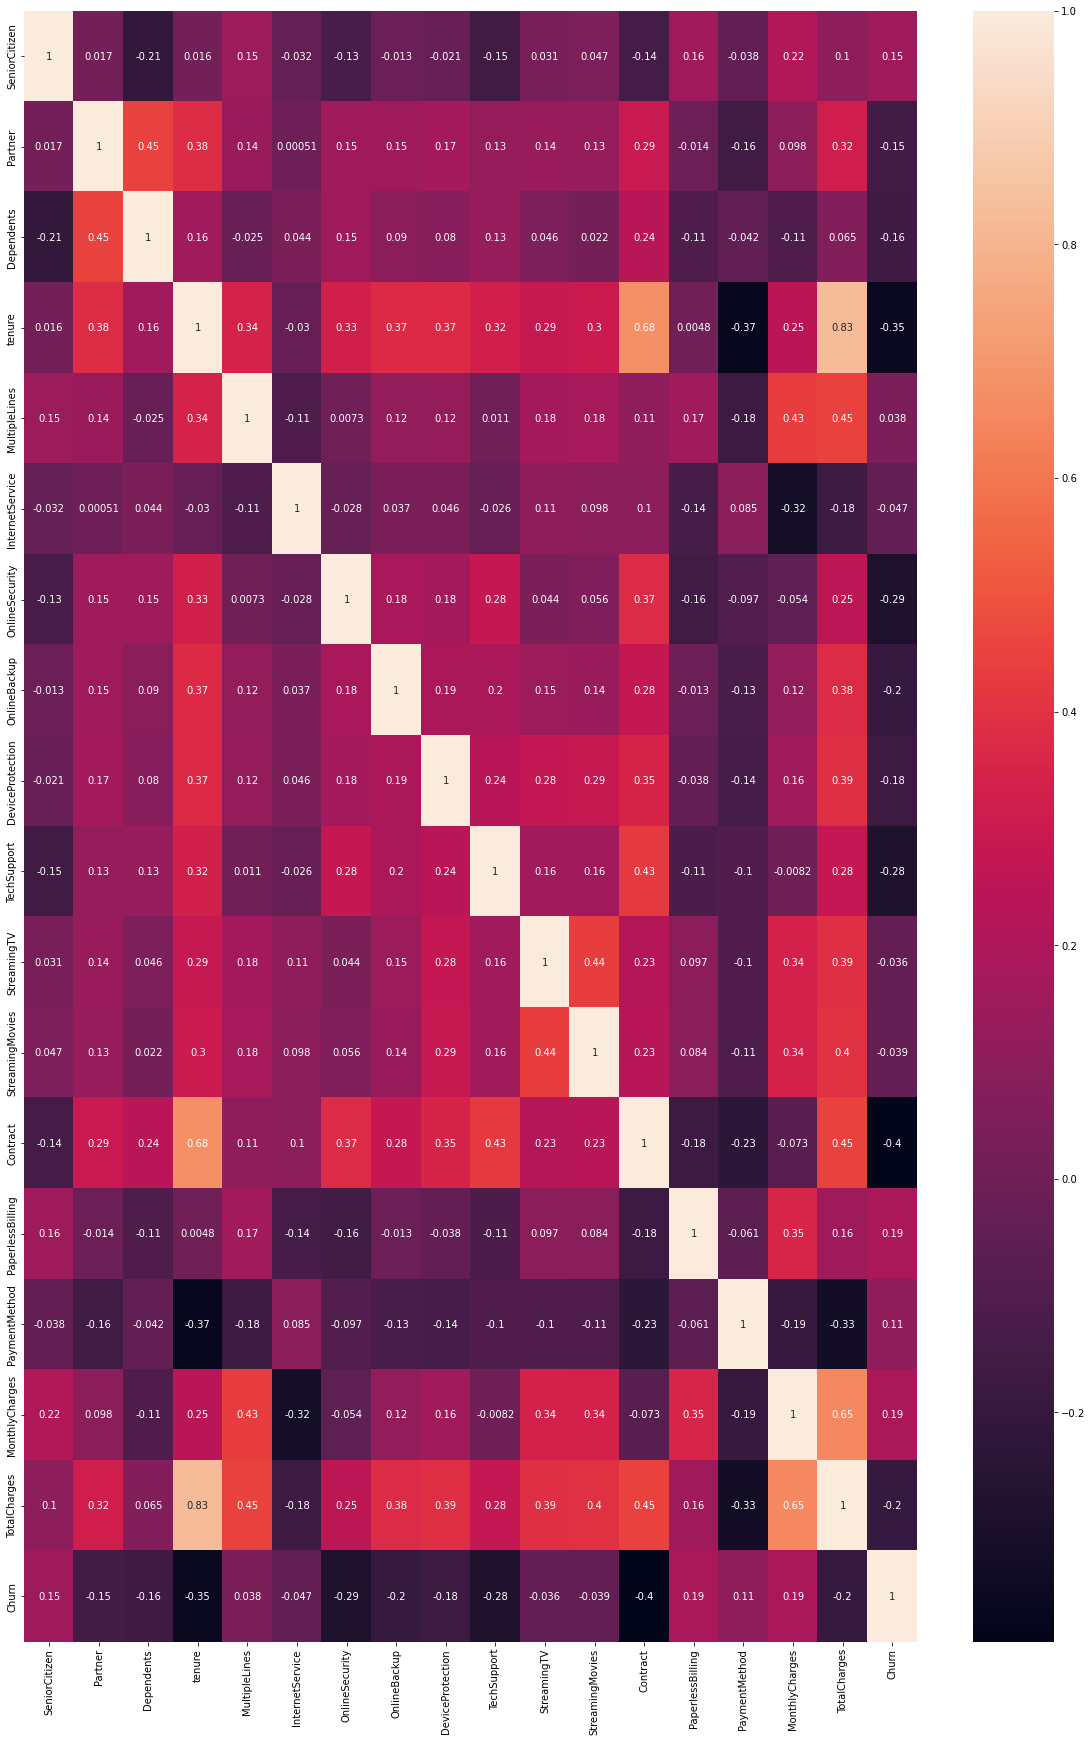

In [ ]:
plt.figure(figsize =(20,30))
sns.heatmap(Churn_Data_Upate.corr(),annot=True)

#### comment : 
- churn dependent all feature normally 

# Deep learning 

In [80]:
X = Churn_Data_Upate.drop('Churn',axis='columns')
Y = Churn_Data_Upate['Churn']


In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [83]:
import tensorflow as tf 
from tensorflow import keras



In [98]:
from tensorflow.python.ops.math_ops import sigmoid
model = keras.Sequential([
    keras.layers.Dense(len(x_train.columns),input_shape=(len(x_train.columns),),activation='relu'),
  
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 73.3745 - accuracy: 0.4964
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.7049
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7634
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7632
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7788
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7627
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7723
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.7524 - accuracy: 0.7662
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7692
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.775

In [99]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.7711


[0.7033526301383972, 0.7711442708969116]

In [100]:
y_predict = model.predict (x_test)
y_predict[:5]

44/44 [==============================] - 1s 4ms/step


array([[1.3202602e-01],
       [4.6776590e-01],
       [1.7164995e-06],
       [6.9467026e-01],
       [8.4917516e-02]], dtype=float32)

In [104]:
y_predict_Update =[]
for pred_var in y_predict : 
  if pred_var > 0.5 : 
    y_predict_Update.append(1)
  else:
    y_predict_Update.append(0)


In [105]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_predict_Update))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       999
           1       0.69      0.39      0.50       408

    accuracy                           0.77      1407
   macro avg       0.74      0.66      0.67      1407
weighted avg       0.76      0.77      0.75      1407



Text(69.0, 0.5, 'Truth')

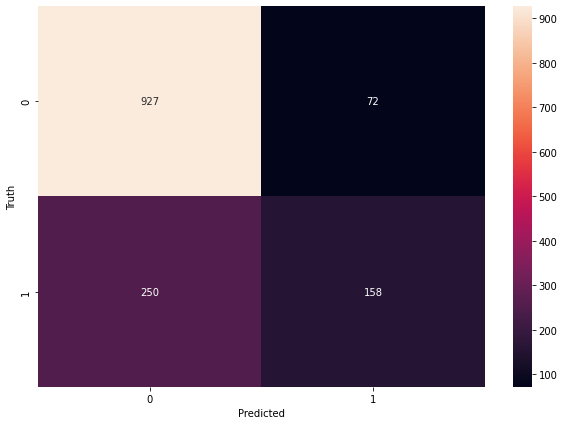

In [106]:
Confus = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_Update)
plt.figure(figsize = (10,7))
sns.heatmap(Confus, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Comment :
- Accuracy : 
          0.77
- Precision for 1 :
          0.38
- Recall for 1 :
          0.92